**The Project done by:**






*   DARA YUVATEJA

*   BALLEM VAMSI

*   DUGGINABOINA VAMSEE

*   YANAMALA TIRUMALA REDDY









In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from PIL import Image
from IPython.display import display, Image
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import random

In [ ]:
!unzip '/content/drive/MyDrive/archive (1).zip'

Archive:  /content/drive/MyDrive/archive (1).zip
replace Fruit And Vegetable Diseases Dataset/Apple__Healthy/FreshApple (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dataset_dir = '/content/Fruit And Vegetable Diseases Dataset'
classes = os.listdir(dataset_dir)

In [ ]:
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

In [ ]:
for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

In [ ]:
class_dir = os.path.join(dataset_dir, cls)
images = os.listdir(class_dir)[:200]

In [ ]:
print(cls, len(images))


Strawberry__Healthy 200


In [ ]:
train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)

In [ ]:
for img in train_images:
    shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
for img in val_images:
    shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
for img in test_images:
    shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

In [ ]:
print("Dataset split into training, validation, and test sets.")

Dataset split into training, validation, and test sets.


In [ ]:
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [ ]:
IMG_SIZE = (224, 224) # Common size for many models like ResNet, VGG, MobileNet

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 120 images belonging to 28 classes.
Found 40 images belonging to 28 classes.
Found 40 images belonging to 28 classes.


In [ ]:
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 

**Data Visualization**

In [ ]:
folder_path = '/content/Fruit And Vegetable Diseases Dataset/Apple__Healthy'

In [ ]:
folder_path = '/content/Fruit And Vegetable Diseases Dataset/Apple__Healthy'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

In [ ]:
selected_image = random.choice(image_files)

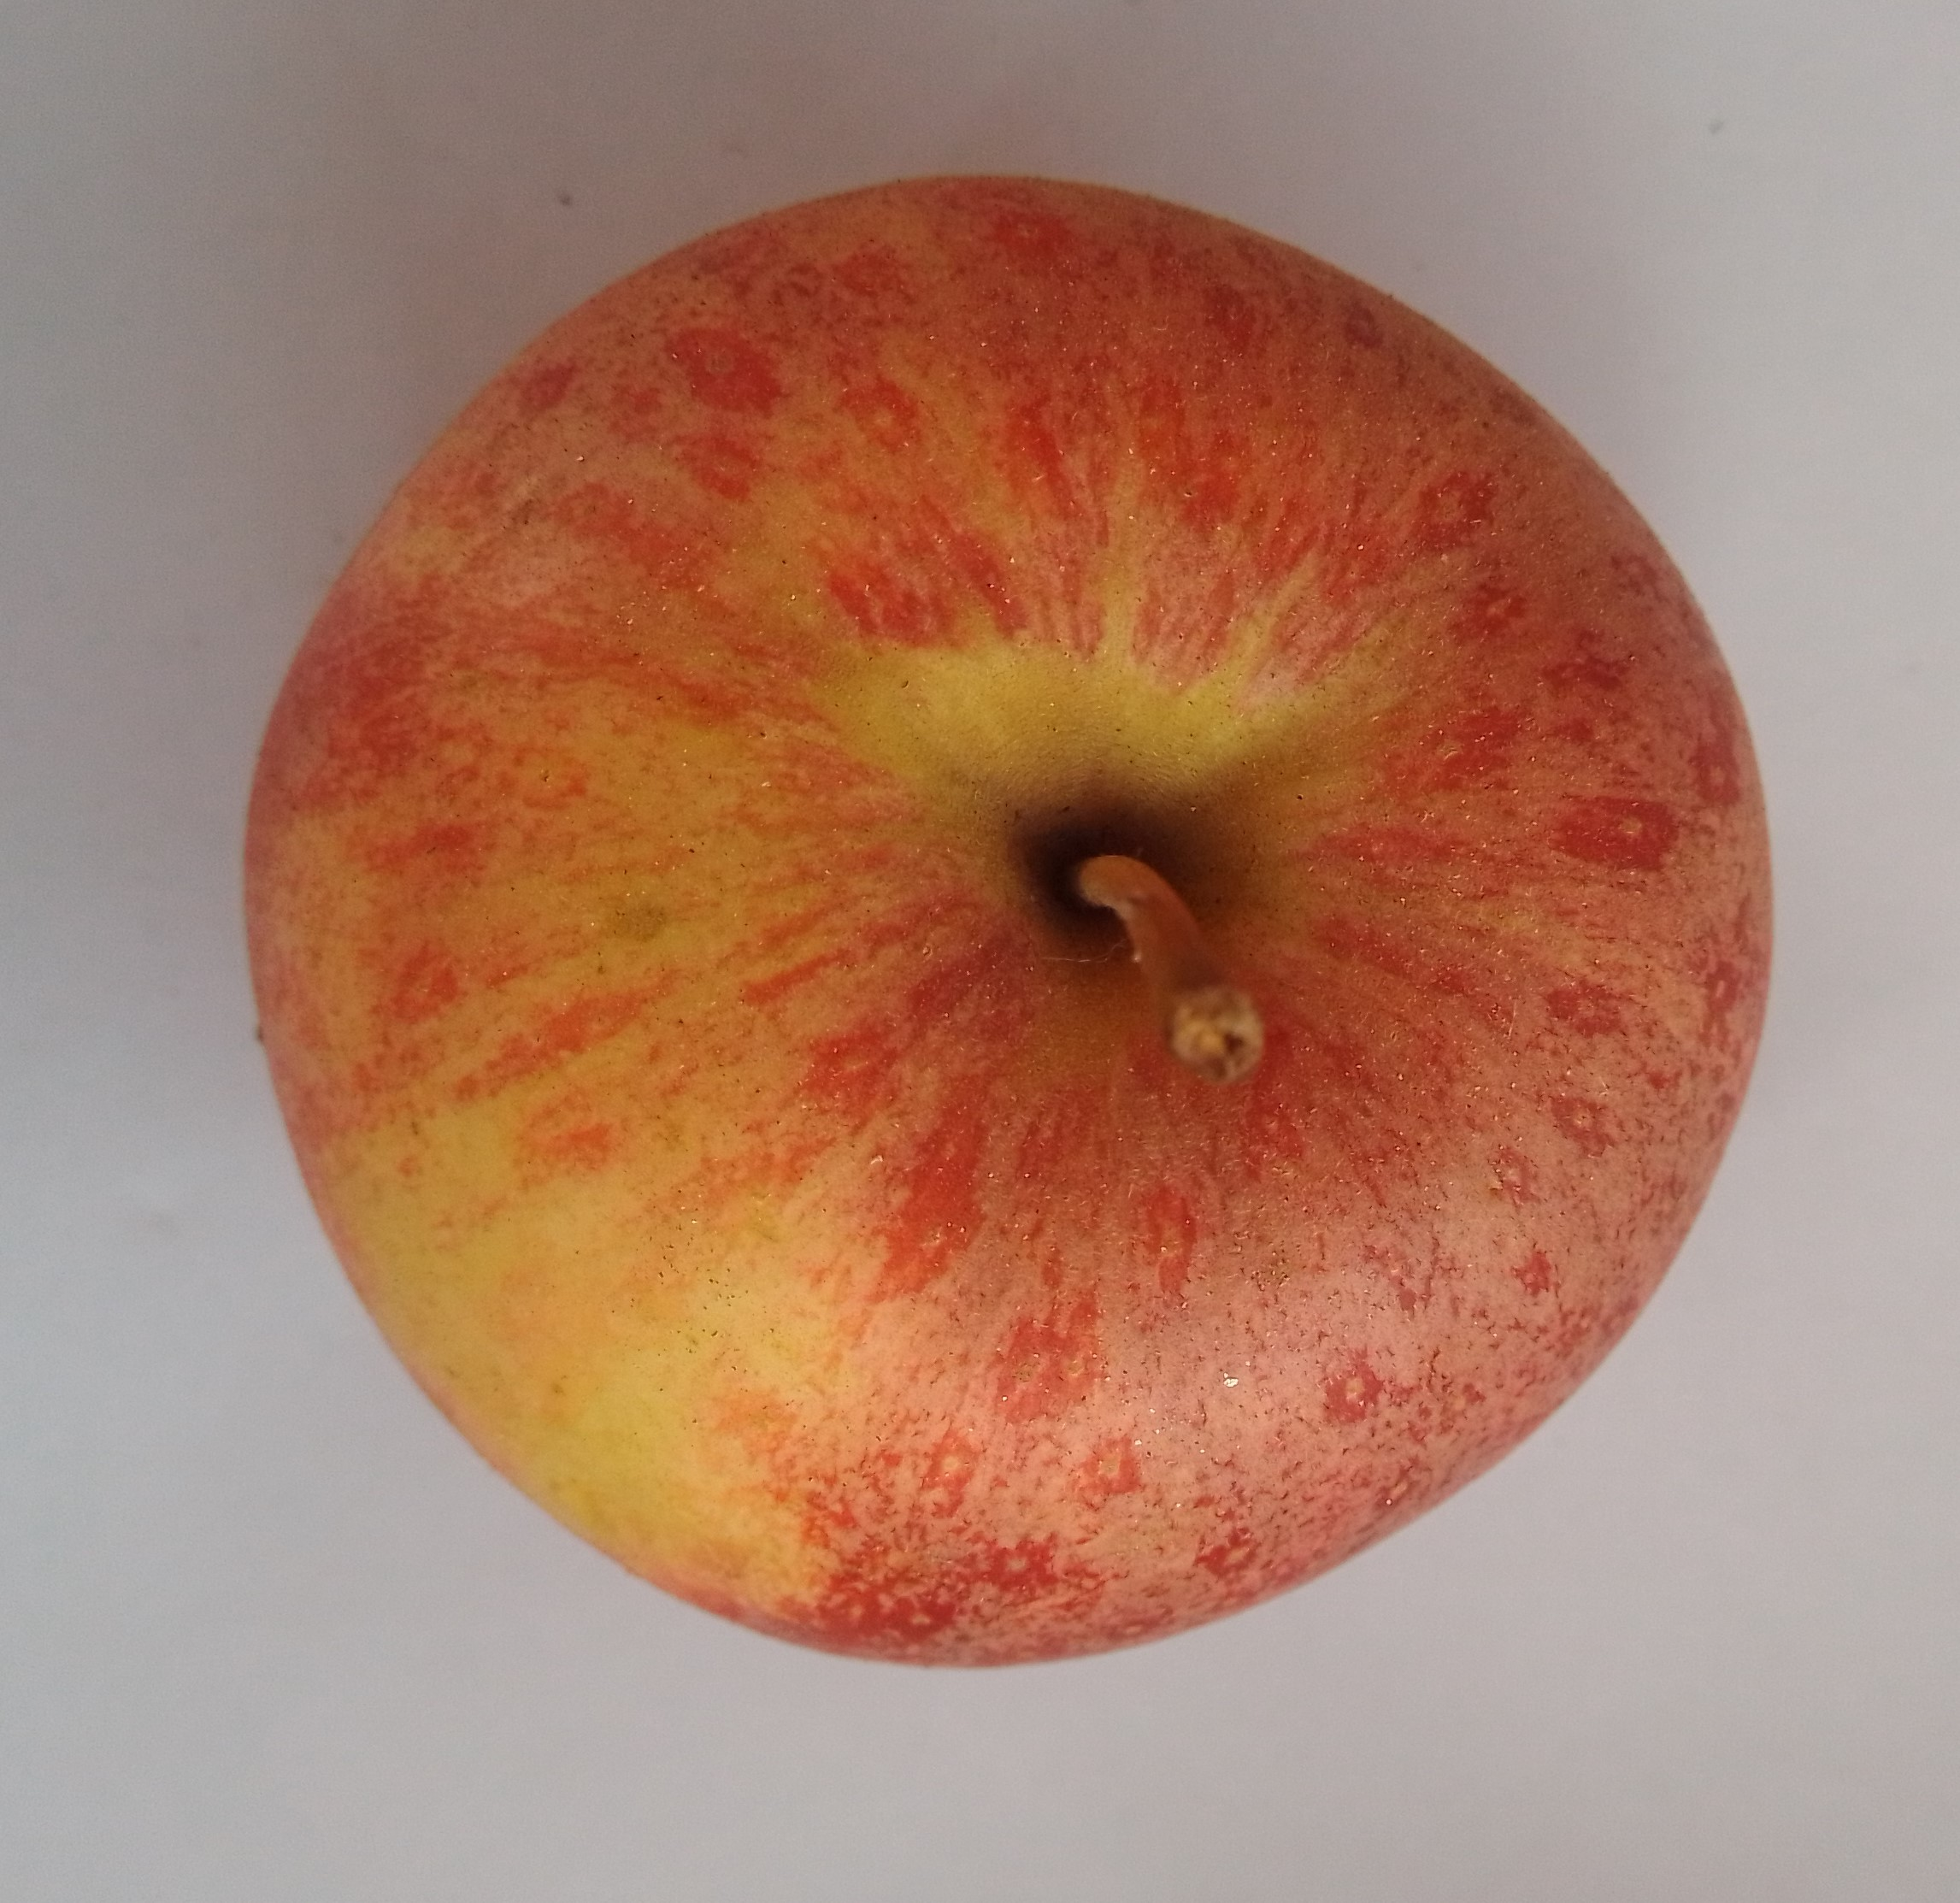

In [ ]:
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
folder_path = "/content/Fruit And Vegetable Diseases Dataset/Strawberry__Healthy"

In [ ]:
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

In [ ]:
selected_image = random.choice(image_files)

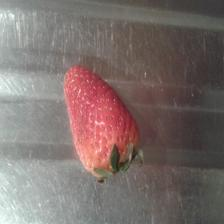

In [ ]:
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
folder_path = '/content/Fruit And Vegetable Diseases Dataset/Cucumber__Rotten'

In [ ]:
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

In [ ]:
selected_image = random.choice(image_files)

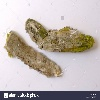

In [ ]:
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
folder_path = '/content/Fruit And Vegetable Diseases Dataset/Strawberry__Rotten'

In [ ]:
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

In [ ]:
selected_image = random.choice(image_files)

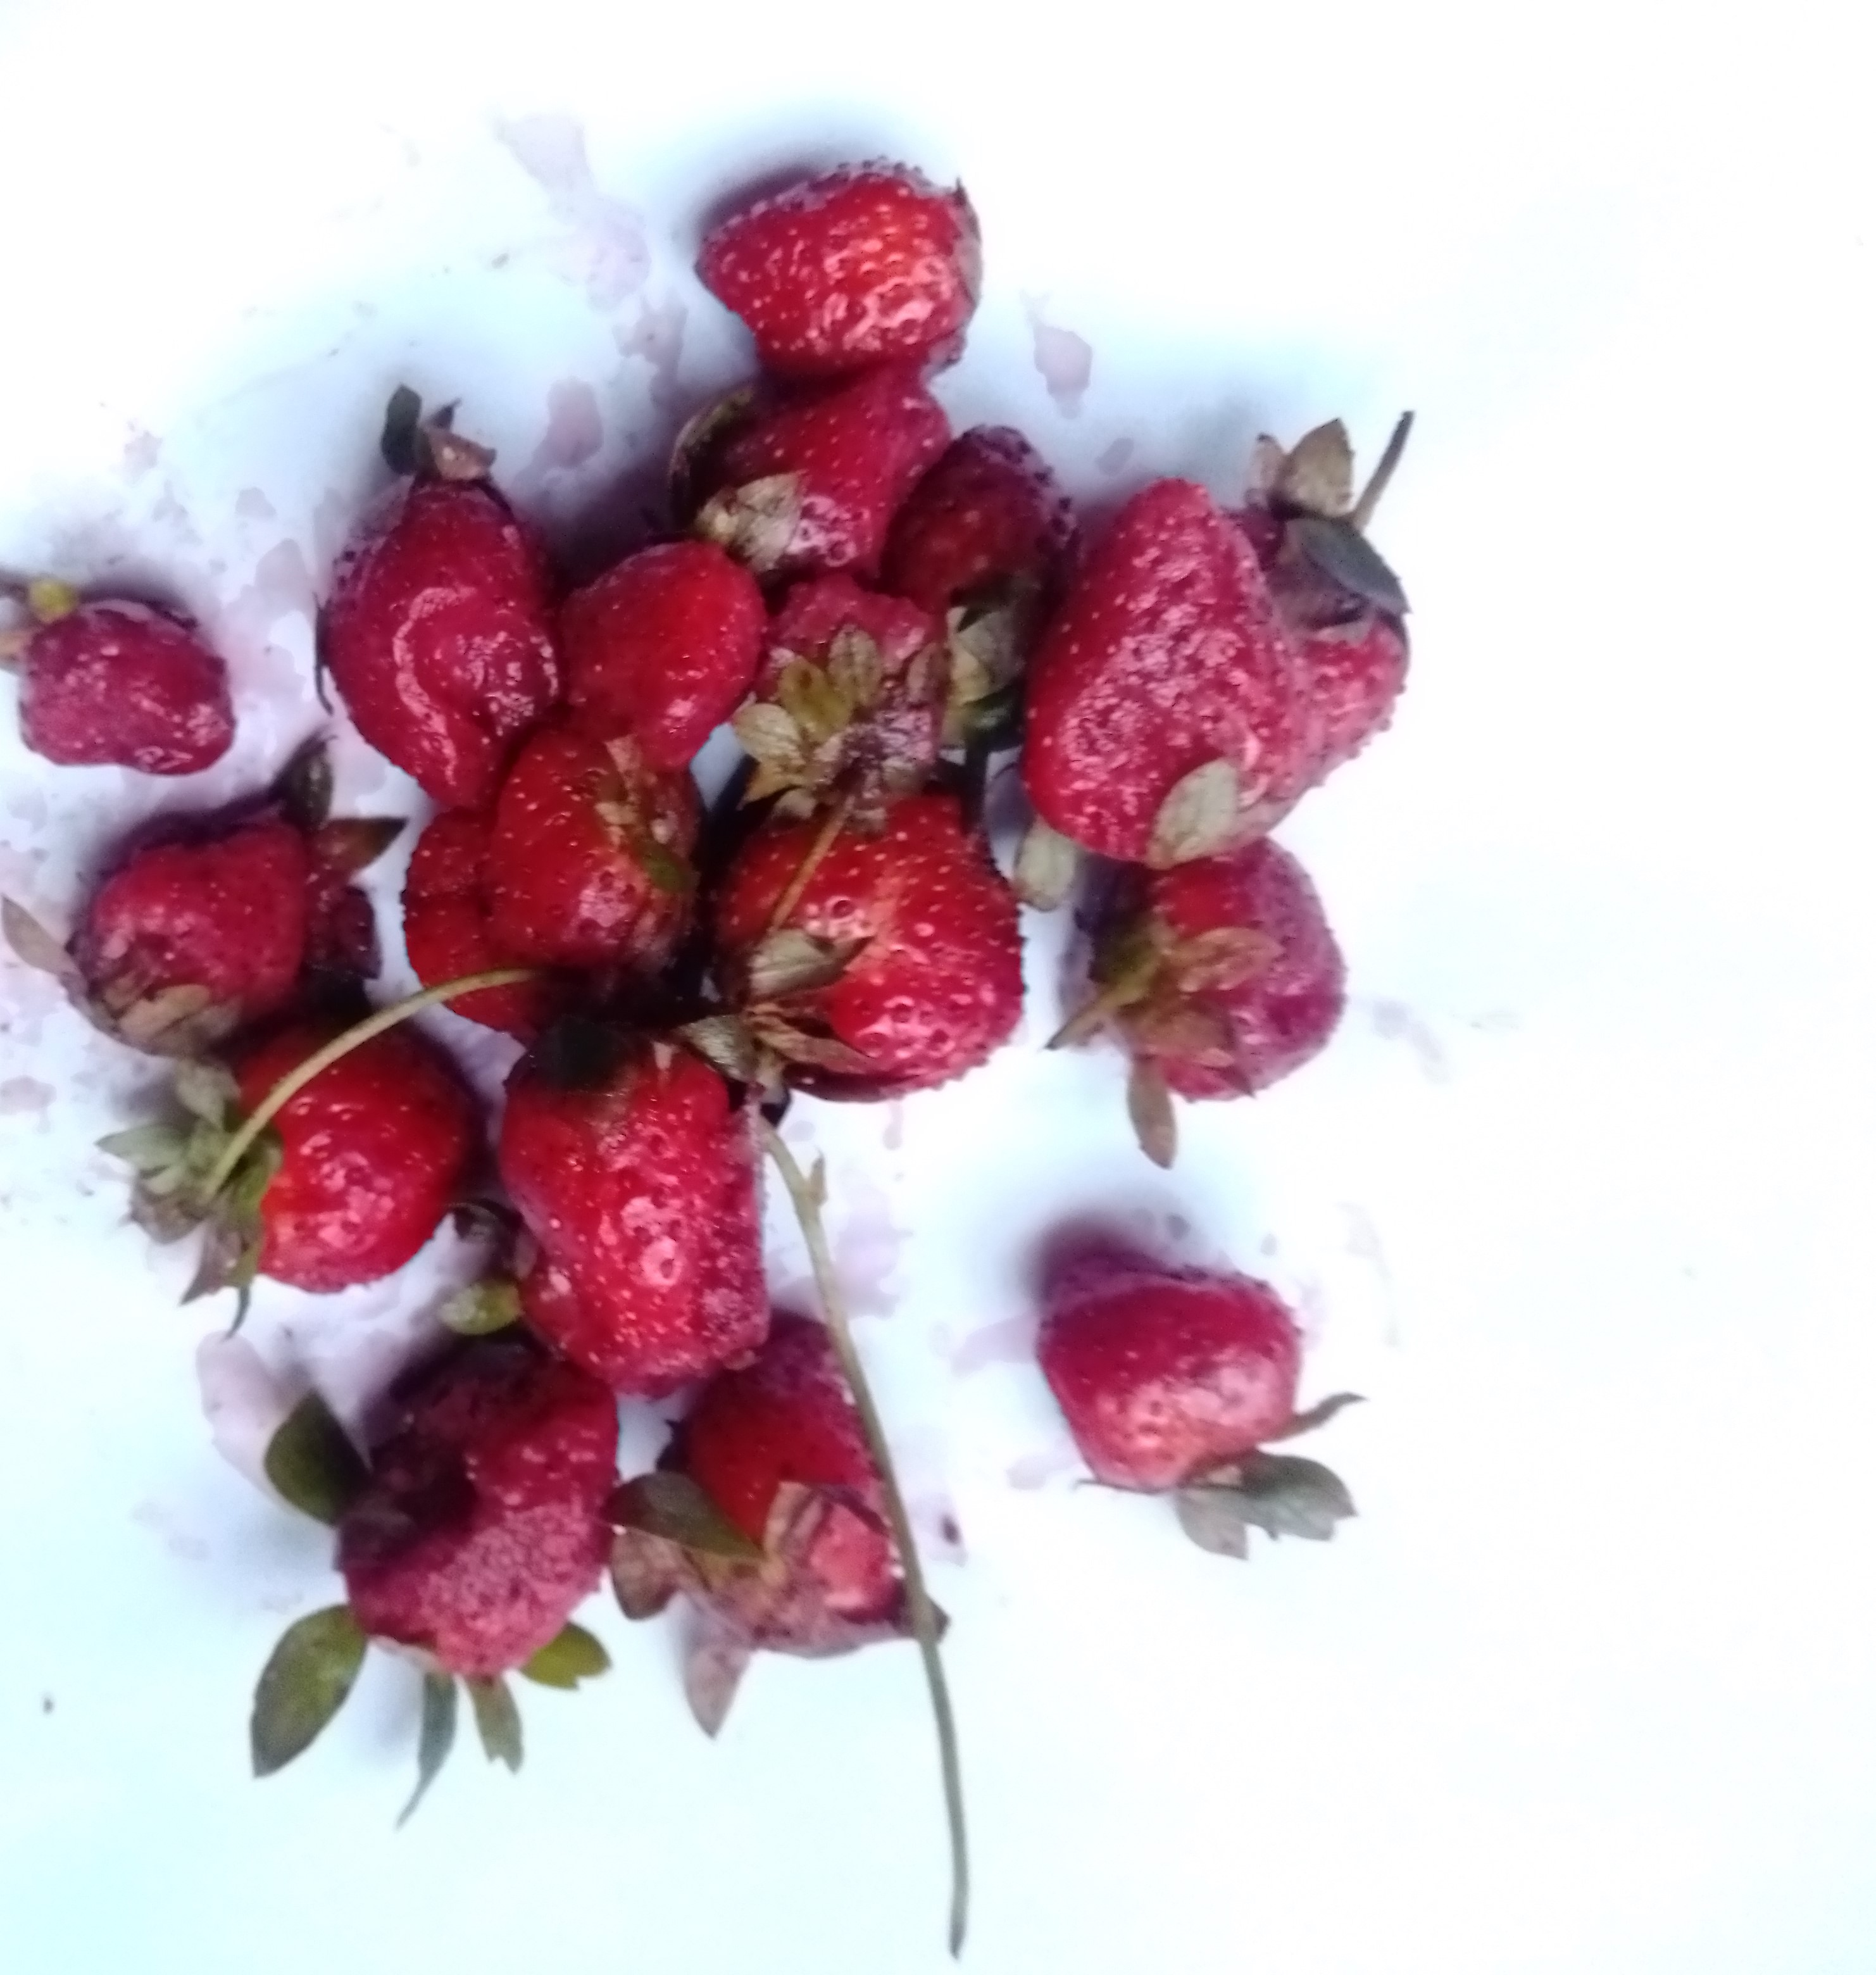

In [ ]:
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
trainpath = '/content/output_dataset/train'
valpath = '/content/output_dataset/val'
testpath = '/content/output_dataset/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,shear_range = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = train_datagen.flow_from_directory(trainpath,target_size = (224,224),batch_size = 20)
test = test_datagen.flow_from_directory(testpath,target_size = (224,224),batch_size = 20)

Found 120 images belonging to 28 classes.
Found 40 images belonging to 28 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
vgg = VGG16(include_top = False, input_shape = (224,224,3))

In [ ]:
for layer in vgg.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
len(vgg.layers)

19

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
output = Dense(28, activation = 'softmax')(x)

In [ ]:
vgg16 = Model(vgg.input,output)

In [ ]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
opt = Adam(learning_rate=0.0001)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
vgg16.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = vgg16.fit(train_generator,validation_data = val_generator,
                    epochs = 15,
                    steps_per_epoch = len(train_generator),
                    callbacks = [early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 93s 24s/step - accuracy: 0.5267 - loss: 2.0201 - val_accuracy: 1.0000 - val_loss: 8.9705e-07
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 89s 25s/step - accuracy: 1.0000 - loss: 7.9503e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 88s 25s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 142s 23s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 89s 24s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


**Testing Model and Data Prediction**

In [ ]:
img_path = '/content/Fruit And Vegetable Diseases Dataset/Bellpepper__Healthy/freshPepper (105).jpg'

In [ ]:
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
img_path = '/content/Fruit And Vegetable Diseases Dataset/Mango__Rotten/119.jpg'

In [ ]:
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
img_path = '/content/Fruit And Vegetable Diseases Dataset/Orange__Healthy/Screen Shot 2018-06-12 at 11.53.33 PM.png'

In [ ]:
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
img_path = '/content/Fruit And Vegetable Diseases Dataset/Cucumber__Healthy/freshCucumber (103).jpg'

In [ ]:
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
img_path = '/content/Fruit And Vegetable Diseases Dataset/Potato__Rotten/rottenPotato (112).jpg'

In [ ]:
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
vgg16.save('healthy_vs_rotten.keras')

In [ ]:
!pip install Flask

In [ ]:
!pip install Flask-Ngrok

In [ ]:
from flask import Flask, render_template, request, jsonify, url_for, redirect
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import numpy as np
import os
import tensorflow as tf

In [ ]:
app=Flask(__name__)
with tf.device('/CPU:0'):  # optional, to avoid GPU overhead in Colab
    model = tf.keras.models.load_model('healthy_vs_rotten.keras')
@app.route('/')
def index():
    return render_template("index.html")

In [ ]:
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

app = Flask(__name__)
model = load_model('healthy_vs_rotten.keras')

@app.route('/predict', methods=['GET', 'POST'])
def output():
    if request.method == 'POST':
        file = request.files['image']  # Use the correct field name

        # Ensure the upload folder exists
        upload_folder = 'static/uploads/'
        if not os.path.exists(upload_folder):
            os.makedirs(upload_folder)

        # Save the uploaded file
        img_path = os.path.join(upload_folder, file.filename)
        file.save(img_path)

        # Load and preprocess image
        img = load_img(img_path, target_size=(224, 224))
        image_array = img_to_array(img) / 255.0  # Normalize
        image_array = np.expand_dims(image_array, axis=0)  # Batch dimension

        # Make prediction
        pred = np.argmax(model.predict(image_array), axis=1)[0]

        # Map index to label
        labels = [
            'Apple_Healthy', 'Apple_Rotten', 'Banana_Healthy', 'Banana_Rotten',
            'Bellpepper_Healthy', 'Bellpepper_Rotten', 'Carrot_Healthy',
            'Carrot_Rotten',
            'Cucumber_Healthy', 'Cucumber_Rotten', 'Grape_Healthy',
            'Grape_Rotten',
            'Guava_Healthy', 'Guava_Rotten', 'Jujube_Healthy', 'Jujube_Rotten',
            'Mango_Healthy', 'Mango_Rotten', 'Orange_Healthy', 'Orange_Rotten',
            'Pomegranate_Healthy', 'Pomegranate_Rotten', 'Potato_Healthy',
            'Potato_Rotten',
            'Strawberry_Healthy', 'Strawberry_Rotten', 'Tomato_Healthy',
            'Tomato_Rotten'
        ]

        prediction = labels[pred]
        print(f"Prediction: {prediction}")

        return render_template("portfolio-details.html", predict=prediction, image_path=img_path)

    return render_template("predict.html")


In [ ]:
if __name__ == '__main__':
    app.run(debug = True, port = 2222)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:2222
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
